# Data Cleaning

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

read the data

In [2]:
data2=pd.read_csv('/content/drive/MyDrive/Participant-02-detail.csv')

Make a copy of the data.Due to immutability of raw data principle, we should never alter the raw data and always make a copy.

In [3]:
copy_data=data2

Combine the counts at the same date

In [4]:
combined_data=copy_data.groupby('Date')['Date','Count'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Remove the outliers

In [5]:
combined_data=combined_data.iloc[2:]

import the data again to get the right format

In [6]:
from google.colab import drive
M2 = pd.read_csv ('/content/drive/MyDrive/new_data.csv')
M2.head()

,Date,Count
0,2022-01-01,22332
1,2022-01-02,23324
2,2022-01-03,8887
3,2022-01-04,22684
4,2022-01-05,19482


Convert object type into datetime types

In [7]:
M2['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M2['Date'] = pd.to_datetime(M2['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M2.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object



Aggregate by weekly data

In [8]:
M2_week=M2 
M2_week=M2_week.resample('W-Mon', on='Date').sum() # resample into week
M2_week.head() # check the weekly step counts.

,Count
Date,
2022-01-03,54543
2022-01-10,125155
2022-01-17,122669
2022-01-24,116574
2022-01-31,92376


# Sub question: Are students less active during the exam week?

According to the calendar of USYD, the exam week of semester 1 is 6th June to 18th June. We want to find out if students tend to walk less during this period.

In [9]:
M2 = pd.read_csv('/content/drive/MyDrive/final_version.csv')


draw the line plot

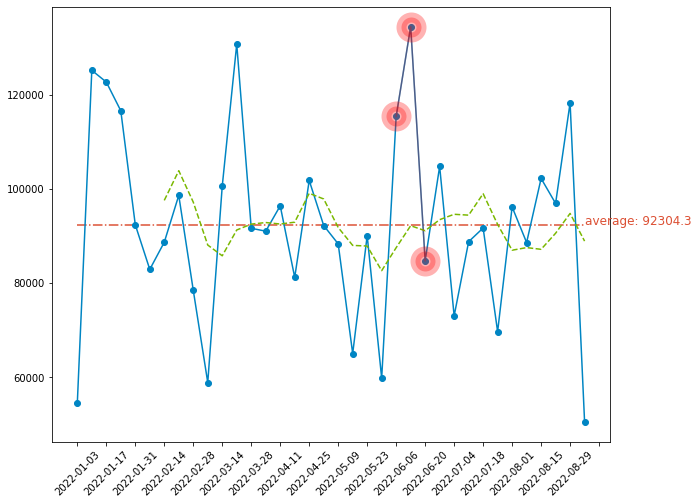

In [10]:
x = M2.Date 
y = M2.Count # define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
import matplotlib as mpl
xlocator = mpl.ticker.MultipleLocator(2)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot
x1 = ['2022-06-06','2022-06-13','2022-06-20']
y1 = [115377,134435,84737]
plt.plot(x1,y1,color='red',alpha=0.3,marker='o'
         ,markeredgecolor='r',markersize='20',markeredgewidth=10)
plt.show() # highlight target data

Conclusion:
It is clear that participant2 tend to walk more on exam weeks. Maybe he/she decide to study outdoors rather than study at home.

# Sub question: Does temperature affect people's willingness to walk?


In [18]:
test_data=pd.read_csv('/content/drive/MyDrive/Participant-02-detail.csv')
test_data['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
test_data.head()
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y%m%d')# convert it into normalized forms.
print(test_data.dtypes)

Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object


convert the data type

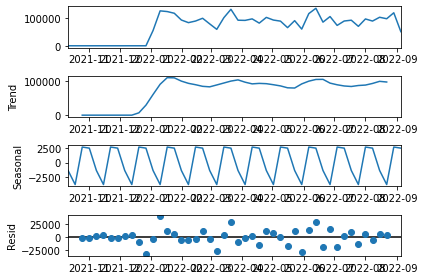

In [19]:
clean= test_data
clean=clean.resample('W-Mon', on='Date').sum()
m4=clean.drop(['Hour'], axis=1)
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()

plot the trend

(array([738064., 738095., 738125., 738156., 738187., 738215., 738246.,
        738276., 738307., 738337., 738368., 738399.]),
 <a list of 12 Text major ticklabel objects>)

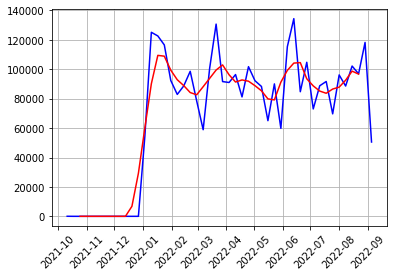

In [20]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

Conclusion: There is no clear sign that temperature affect participant2's willingness to walk.

# Sub question: Would rainfall be the factor that affect the week-to-week data?

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

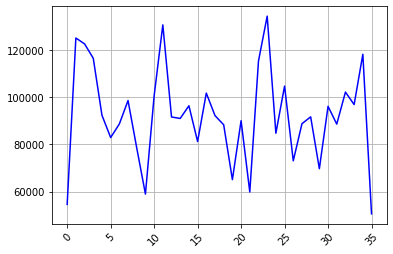

In [22]:
from scipy.stats import linregress
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(M2.index, M2['Count'], c='blue')
plt.xticks(rotation=45)

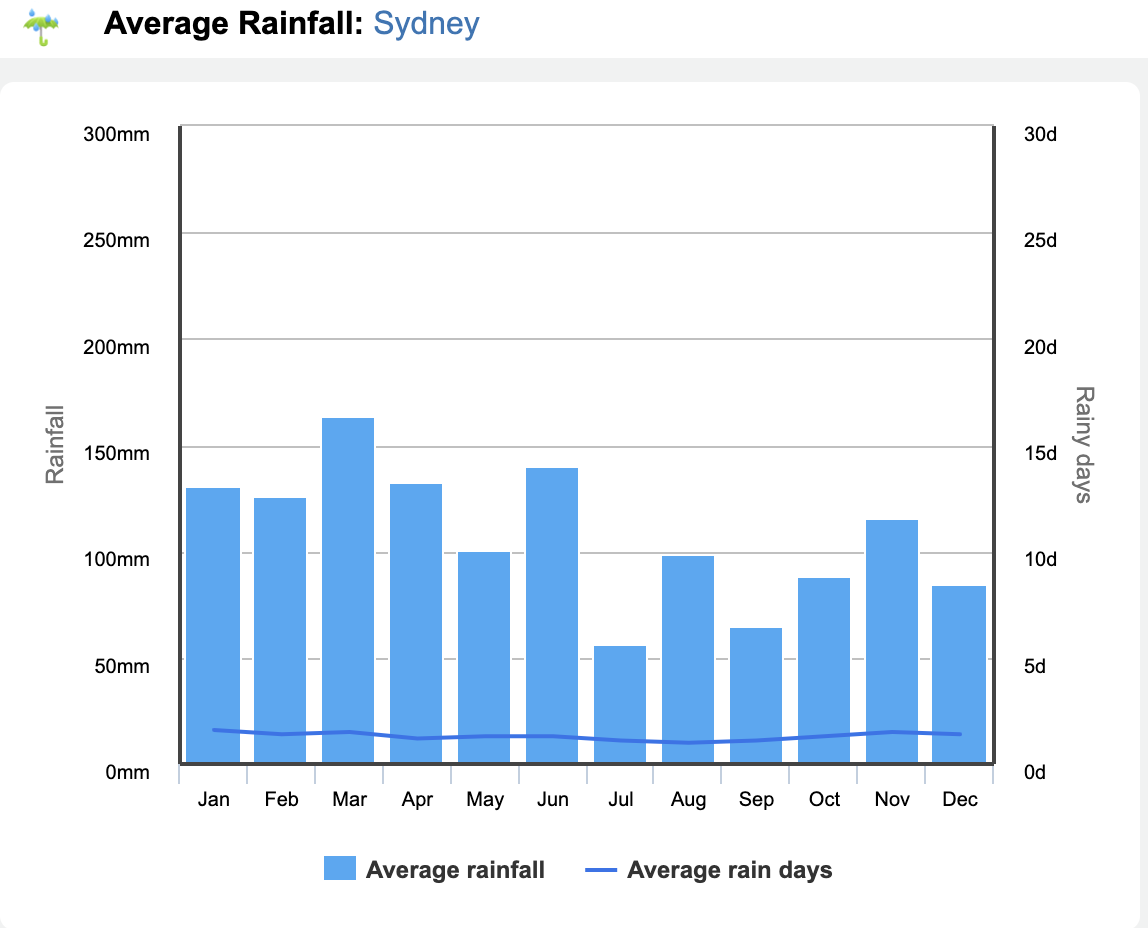

Conclusion: In months which rains a lot like March, June and November, the step count for participant2 shows a clear decline. Rainfall is a factor that affect weekly step data.

# Sub question: Does the steps for each week affect by season?

In [30]:
M2 = pd.read_csv ('/content/drive/MyDrive/new_data.csv')
M2['Date'].replace('-','',regex=True,inplace=True)
M2['Date'] = pd.to_datetime(M2['Date'], format='%Y%m%d')
weaksum = pd.DataFrame(M2.resample('W', on='Date')['Count'].sum()).reset_index()
gb_month = weaksum.groupby([weaksum['Date'].dt.isocalendar().week, weaksum['Date'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()
gb_month.head()

,week,month,Count
0,1,1,118019.0
1,2,1,115127.0
2,3,1,119082.0
3,4,1,100066.0
4,5,2,91408.0


Substitute month into season

In [31]:
season = gb_month.copy()
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')
season.head()

,week,month,Count
0,1,Summer,118019.0
1,2,Summer,115127.0
2,3,Summer,119082.0
3,4,Summer,100066.0
4,5,Summer,91408.0


In [33]:
season.rename({"Count":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks
gb_season.head()

sum of steps
season week              
Fall   9          63805.0
       10         92672.0
       11        124428.0
       12         96908.0
       13        101214.0

In [34]:
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

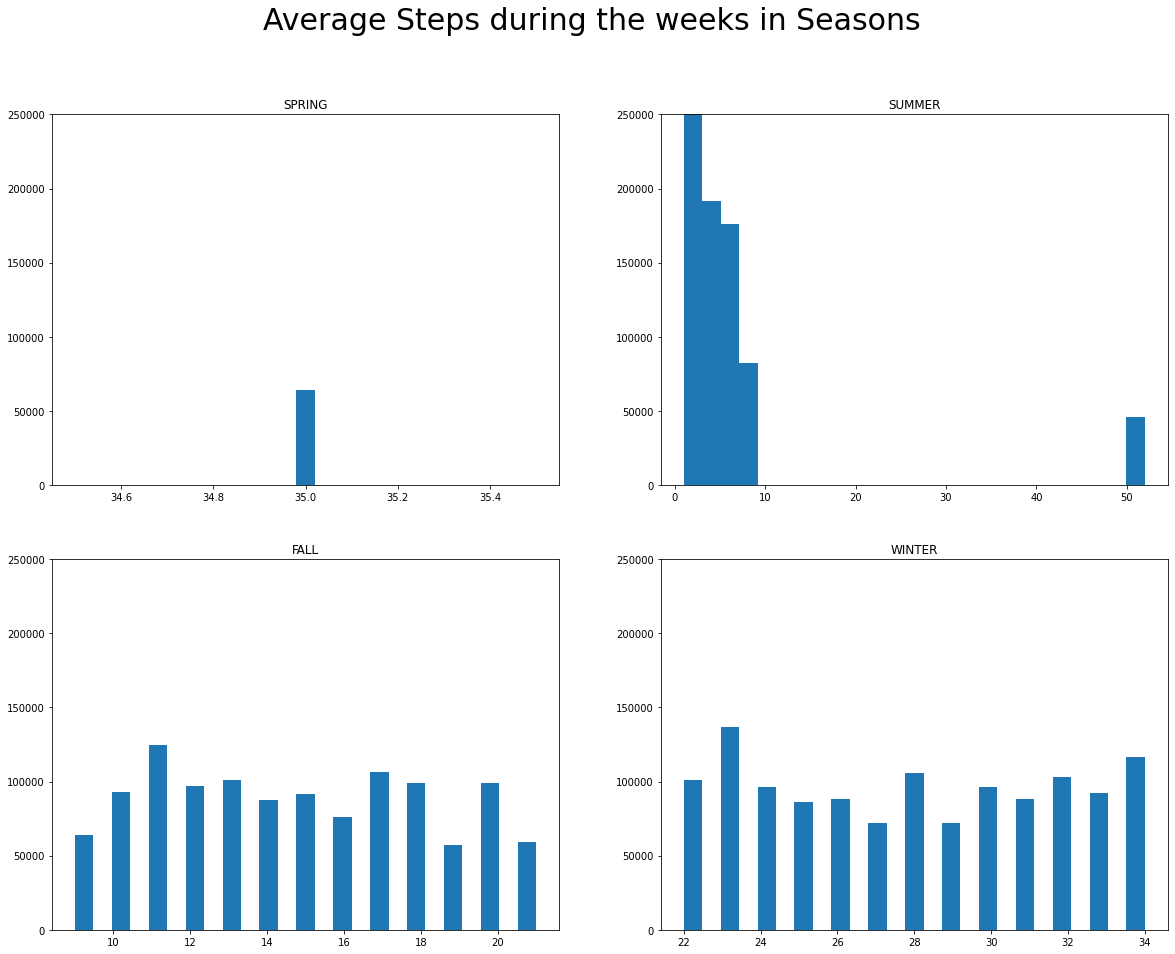

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)

Conclusion: Participant tend to walk more in summer and season does affect step count.

# Sub question: How does week-to-week data illustrates the probability of participate getting healthy?

In [36]:
weeksteps02=pd.read_csv('/content/drive/MyDrive/weeks_and_steps_02.csv')
weeksteps02['Week'] = weeksteps02['Week'].astype('int') # Change into int type
weeksteps02['sedentary'] = weeksteps02['sedentary'].astype('int')

In [37]:

x02 = weeksteps02.drop(columns='sedentary') # Independent
y02 = weeksteps02['sedentary']

In [39]:
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x02_train,x02_test,y02_train,y02_test = train_test_split(x02, y02, test_size = 0.5) # I selected 30% of data for testing. Temporarily do not set random sampling.

In [41]:
model02 = LogisticRegression()
model02 = model02.fit(x02_train, y02_train)
Y_prd02 = model02.predict(x02_test)
Y_prd02[:20] # Get the prediction of sedentary.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [42]:
A = pd.DataFrame()
A['Predicted'] = list(Y_prd02)
A['Actual'] = list(y02_test)
A.head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [43]:
acc02 = model02.score(x02_test, y02_test)
acc02

0.9444444444444444

In [44]:
Y_prd_acc02 = model02.predict_proba(x02_test)
Acc_table02 = pd.DataFrame(Y_prd_acc02, columns = ['Probability of not sedentary','Probability of sedentary'])
Acc_table02.head()

,Probability of not sedentary,Probability of sedentary
0,0.961025,0.038975
1,0.974403,0.025597
2,0.946850,0.053150
3,0.854314,0.145686
4,0.871266,0.128734


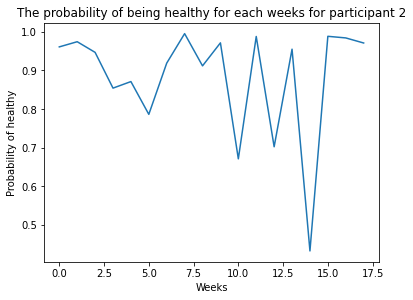

In [46]:
y02 = Acc_table02['Probability of not sedentary']
x02 = [  ]
for n in range(0,len(Acc_table02)):
  x02.append(n)
  n+=1
plt.plot(x02,y02)
plt.xlabel("Weeks")
plt.ylabel("Probability of healthy")
plt.title("The probability of being healthy for each weeks for participant 2")
plt.subplots_adjust(bottom=0.05)

Conclusion: Participant2 has a high rate of being healthy.